# Miniproject: Product id

Работа с грязными данными

На этот раз данные имеют следующую структуру:

- записываются для каждого пользователя, совершившего покупки, каждый день
- для каждой даты есть своя папка, внутри неё – папки для каждого пользователя
- внутри каждой папки есть файл data.csv, где и хранятся данные

Например, 30 декабря три покупателя сделали покупки, 31 – два 
(папки 2020-12-30 и 2020-12-31 соответственно). Поскольку клиент FirstName_LastName1 купил товары в оба дня, для него имеется папка в папке для каждой из дат. Для других клиентов – по одной.

### Задачи

1) Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), а также имя пользователя (name), и дата этих покупок (date), соответствует названию папки, где лежит папка с пользователем)

2) Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.

3) Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. Сколько было продано единиц товара с product_id==56?

4) Визуализируйте продажи по дням.

5) Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: 
- колонки из самих файлов (product_id, quantity)
- имя пользователя (name)
- дату этих покупок (date), соответствует названию папки, где лежит папка с пользователем

In [2]:
df = []
way_to_data = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-eremina/shared/homeworks/python_ds_miniprojects/4/data/'
for adress, dirs, files in os.walk(way_to_data):
    for name in files:
        file = (os.path.join(adress, name)) # объединение для полного названия файла
        if 'csv' in file:
            df_1 = pd.read_csv(file) # чтение csv файлов в цикле
            n = str(file).split('/')[-2] # извлечение имени пользователя и даты из пути
            d = str(file).split('/')[-3]
            df_1['name'] = n # заполнение столбцов 'name' и 'date' в промежуточном df
            df_1['date'] = d
            df.append(df_1)
    
df = pd.concat(df) # соединение df
df.reset_index(drop=True)
df = df.drop(columns='Unnamed: 0')

In [3]:
# другой метод (почти то же самое)

# tree = os.walk('data')
# data_files = []
# target_file = 'data.csv'

# path, directories (folders), files

# for item in tree:
#     files = item[-1]
    
    # если папка содержит файлы и первый файл data.csv
    
#     if len(files) > 0 and target_file in files:
#         path = os.path.join(item[0], target_file)
#         data_files.append(path)

# data_files_df = []

# for path in data_files:
#     df = pd.read_csv(path, index_col=0)
#     date, name = path.split('/'[1:3])
#     df['name'] = name
#     df['date'] = date
#     data_files_df.append(df)
    
# data = pd.concat(data_files_df, ignore_index = True)

In [4]:
df.head()

,product_id,quantity,name,date
0,27,4,Petr_Ivanov,2020-12-05
1,89,1,Petr_Ivanov,2020-12-05
2,33,2,Petr_Ivanov,2020-12-05
3,8,3,Petr_Ivanov,2020-12-05
4,16,1,Petr_Ivanov,2020-12-05


Укажите сумму по колонке quantity

In [5]:
df.quantity.sum()

480

Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке

In [6]:
df_max_quantity_name = df.groupby('name', as_index = False) \
                         .quantity.sum()

In [7]:
max_quan = df_max_quantity_name.quantity.max()

In [8]:
df_max_quantity_name.loc[df_max_quantity_name.quantity == max_quan].name.sort_values()

3     Alexey_Smirnov
13      Petr_Smirnov
Name: name, dtype: object

Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот

- по оси x – идентификаторы товаров (product_id) 
- по оси y – суммарное число их покупок (сколько товаров с таким product_id было продано)

Попробуйте изменить параметры графика: цвет (color), прозрачность (alpha), сортировку значений по оси х (order). 

В качестве ответа укажите, сколько было продано единиц товара с product_id равным 56.

In [9]:
quantity_product_id_df = df \
    .groupby('product_id', as_index = False).agg({'quantity' : 'sum'})

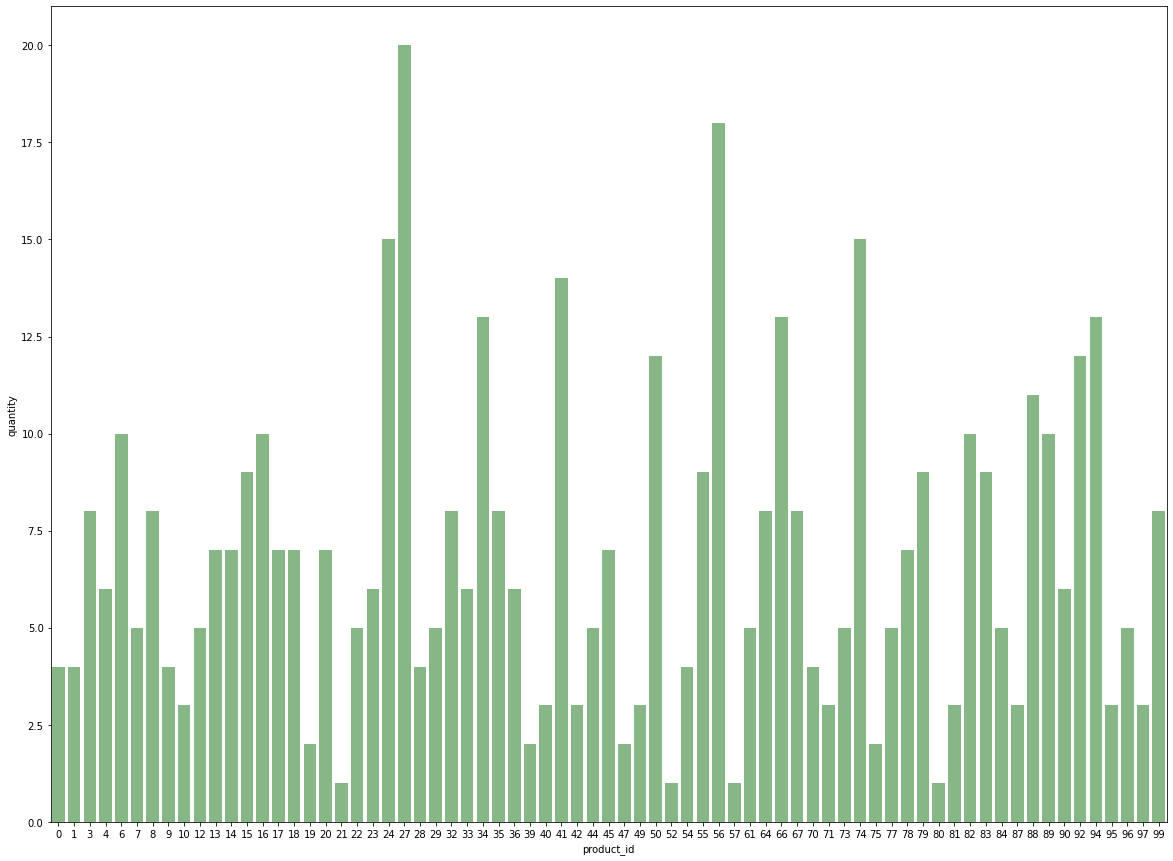

In [10]:
plt.figure(figsize=(20, 15))
sns.barplot(data=quantity_product_id_df, x = 'product_id', y = 'quantity', color = 'green', alpha = 0.5)

In [11]:
quantity_product_id_df.query('product_id == 56')

,product_id,quantity
42,56,18


Посмотрим на продажи по дням

Для визуализации снова используйте барплот, только теперь по оси x будут дни, по которым у нас есть данные (date).

In [12]:
quantity_date_df = df \
    .groupby('date', as_index = False).agg({'quantity' : 'sum'})

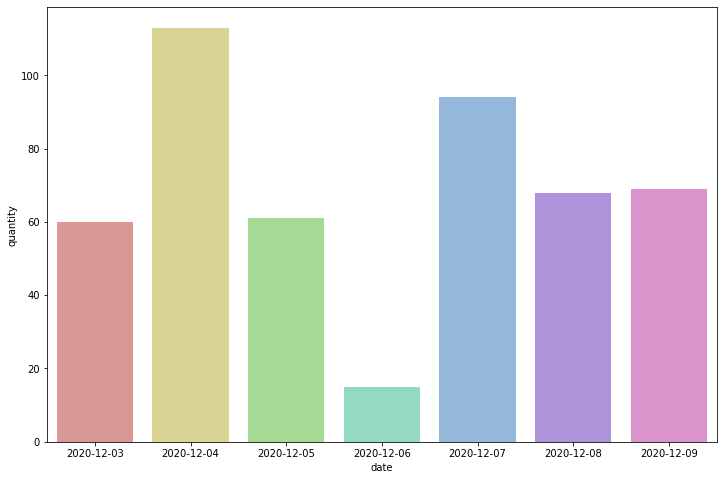

In [13]:
plt.figure(figsize=(12, 8))
sns.barplot(data=quantity_date_df, x = 'date', y = 'quantity', palette = 'hls', alpha = 0.7, order = quantity_date_df['date'])

In [14]:
quantity_date_df

,date,quantity
0,2020-12-03,60
1,2020-12-04,113
2,2020-12-05,61
3,2020-12-06,15
4,2020-12-07,94
5,2020-12-08,68
6,2020-12-09,69


Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? 

Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

In [15]:
repurchases_df = (
    df.drop_duplicates(subset=['date', 'name', 'product_id']) 
    .groupby(['name', 'product_id'], as_index=False) 
    .agg({'quantity' : 'count'}) 
    .query('quantity > 1')
)

In [16]:
repurchases_df.name.count()

2